# Seatfinder Data

In [7]:
import sys
print(sys.executable)

/Users/laurasand/Documents/Master Informatik/Data Literacy/project/dl_env/bin/python3


In [ ]:
!pip install pandas
!pip install matplotlib


In [10]:
import pandas as pd
import matplotlib.pyplot as plt

### Read the converted csv data

In [1]:


locations = pd.read_csv("locations.csv")
manual_counts = pd.read_csv("manual_counts.csv")
seat_estimates = pd.read_csv("seat_estimates.csv")
wlan_clients = pd.read_csv("wlan_clients.csv")


In [15]:

print(locations.head())        # first 5 rows
print(locations.info())        # column types and counts
#print(locations.describe())    # summary stats (for numeric data)

#print(manual_counts.head())        # first 5 rows
print(manual_counts.info())        # column types and counts
#print(manual_counts.describe())    # summary stats (for numeric data)

print(seat_estimates.head())        # first 5 rows
print(seat_estimates.info())        # column types and counts
#print(seat_estimates.describe())    # summary stats (for numeric data)

#print(wlan_clients.head())        # first 5 rows
print(wlan_clients.info())        # column types and counts
#print(wlan_clients.describe())    # summary stats (for numeric data)


   id            timestamp     name                              longname  \
0  19  2016-01-01 00:00:00    UBCUG                    PCB-Bibliothek, UG   
1  12  2016-01-01 00:00:00    UBA6A              Ammerbau, Ebene 6, Links   
2  20  2016-01-01 00:00:00    UBLZN       Lernzentrum Naturwissenschaften   
3   3  2016-01-01 00:00:00  UBB2HLS  Historischer Lesesaal, Bonatzbau, EG   
4  18  2016-01-01 00:00:00    UBCEG                    PCB-Bibliothek, EG   

                                                 url  \
0  http://tuebingen.artec-berlin.de/?lang=de_DE&m...   
1  http://tuebingen.artec-berlin.de/?lang=de_DE&m...   
2  http://tuebingen.artec-berlin.de/?lang=de_DE&m...   
3  http://tuebingen.artec-berlin.de/?lang=de_DE&m...   
4  http://tuebingen.artec-berlin.de/?lang=de_DE&m...   

                               building  level  room    geocoordinates  \
0  Auf der Morgenstelle, Hörsaalzentrum   -1.0   NaN  48.53658;9.03623   
1                                   NaN    6.0   NaN

In [5]:
# timestamps 
print("Data covers from", seat_estimates['timestamp'].min(), "to", seat_estimates['timestamp'].max())


Data covers from 2016-04-25 10:07:11 to 2024-10-15 13:16:32


### Visualization of one day in two different libraries 

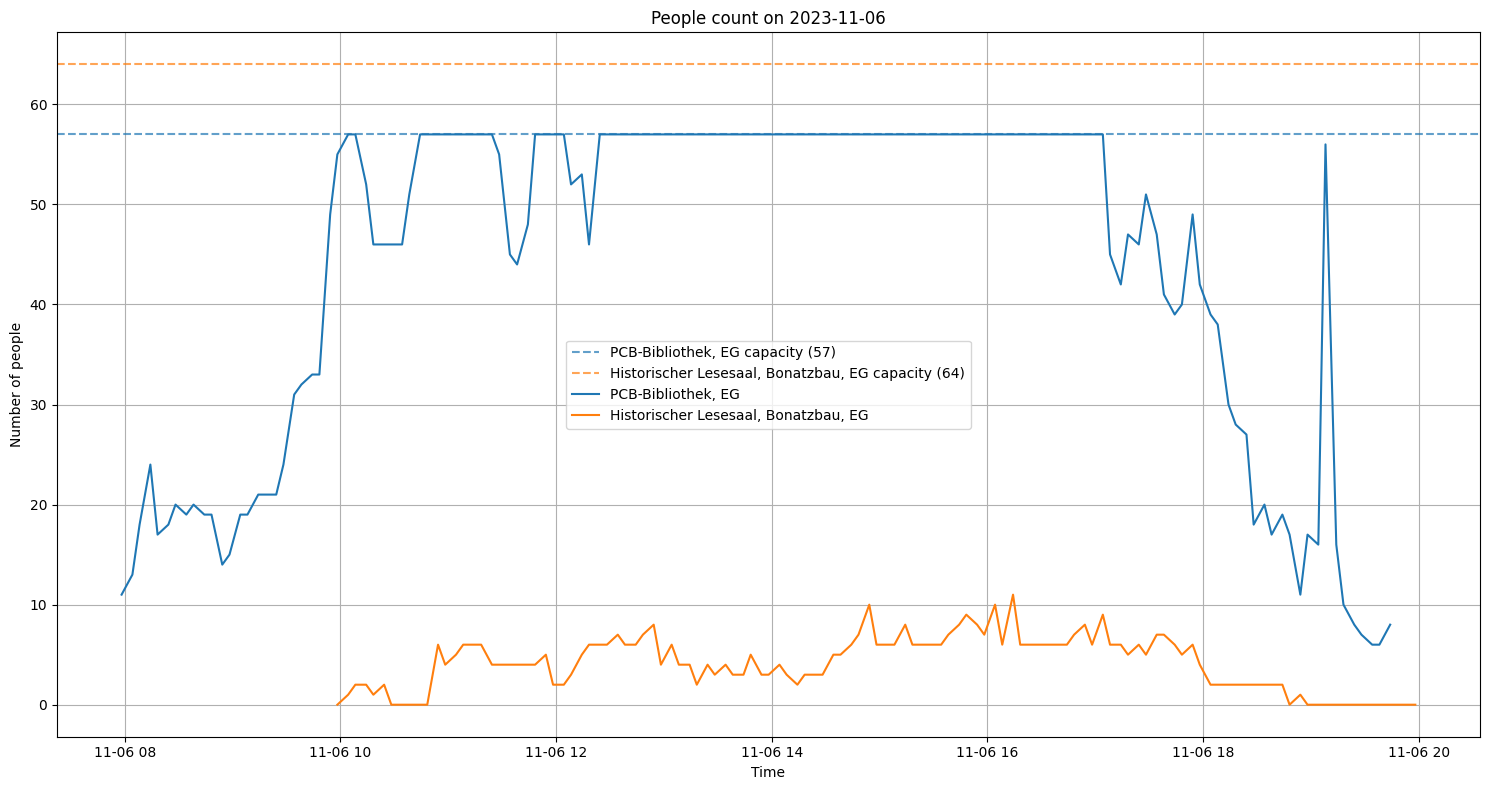

In [18]:
# ensure datetime
seat_estimates['timestamp'] = pd.to_datetime(seat_estimates['timestamp'])

# pick libraries and day
building_a = 18
building_b = 3
day = '2023-11-06'

# filter by building and day
df_a = seat_estimates[
    (seat_estimates['location_id'] == building_a) &
    (seat_estimates['timestamp'].dt.date == pd.to_datetime(day).date()) 
]
df_b = seat_estimates[
    (seat_estimates['location_id'] == building_b) &
    (seat_estimates['timestamp'].dt.date == pd.to_datetime(day).date())
]

# get building names and capacities

info_a = locations.loc[locations['id'] == building_a].iloc[0]
info_b = locations.loc[locations['id'] == building_b].iloc[0]

name_a = info_a['longname']
name_b = info_b['longname']
cap_a = info_a['availableseats']     
cap_b = info_b['availableseats']

## plot
plt.figure(figsize=(15, 8))
plt.axhline(y=cap_a, color='C0', linestyle='--', alpha=0.7, label=f"{name_a} capacity ({cap_a})")
plt.axhline(y=cap_b, color='C1', linestyle='--', alpha=0.7, label=f"{name_b} capacity ({cap_b})")


plt.plot(df_a['timestamp'], df_a['occupiedseats'], label=name_a)
plt.plot(df_b['timestamp'], df_b['occupiedseats'], label=name_b)
plt.title(f"People count on {day}")
plt.xlabel("Time")
plt.ylabel("Number of people")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


### Comparision of before Covid, during Covid and after Covid 

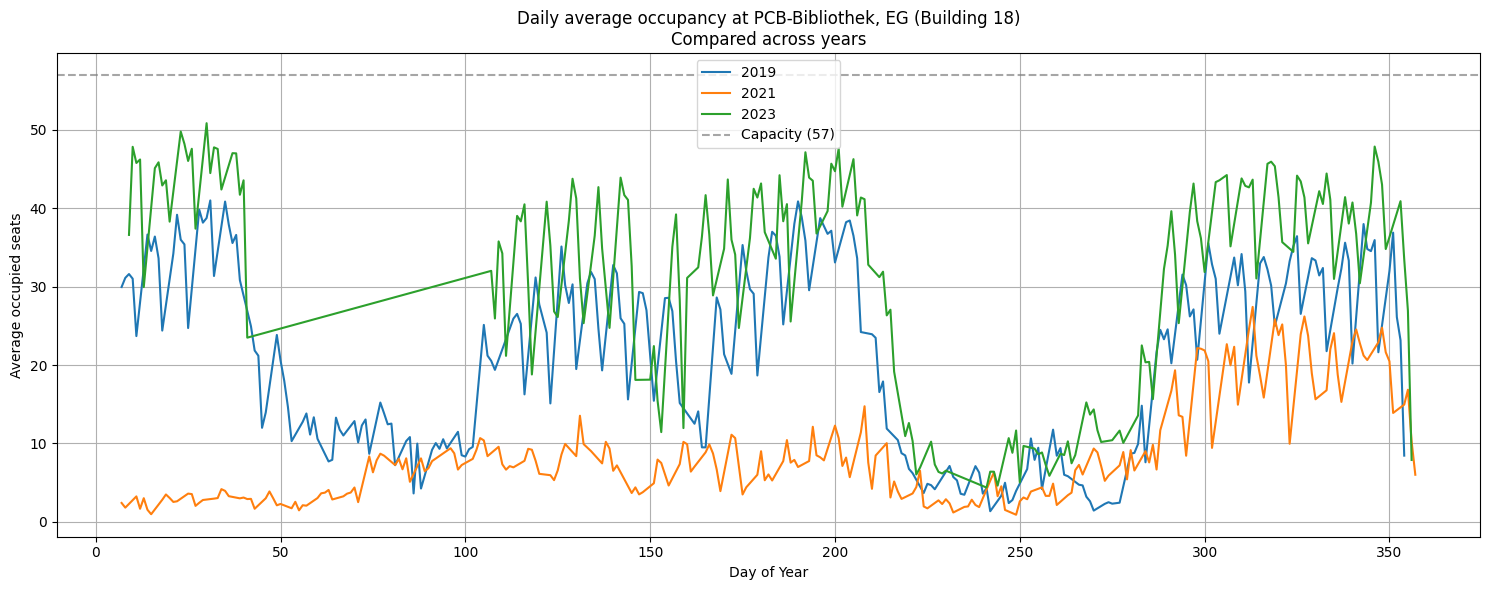

In [28]:

# filter to one location
building_id = 18
df_18 = seat_estimates[seat_estimates['location_id'] == building_id].copy()

# filter for this building and selected years
years = [2019, 2021, 2023]
df_18 = seat_estimates[seat_estimates['location_id'] == building_id].copy()
df_18['year'] = df_18['timestamp'].dt.year
df_18 = df_18[df_18['year'].isin(years)]

# compute daily means
df_18['date'] = df_18['timestamp'].dt.date
daily_means = df_18.groupby(['year', 'date'])['occupiedseats'].mean().reset_index()
# make sure 'date' is datetime for day-of-year extraction
daily_means['dayofyear'] = pd.to_datetime(daily_means['date']).dt.day_of_year

# get building info
info = locations.loc[locations['id'] == building_id].iloc[0]
name = info['longname']
cap = info['availableseats']   

# plot 
plt.figure(figsize=(15, 6))
for year in years:
    subset = daily_means[daily_means['year'] == year]
    plt.plot(subset['dayofyear'], subset['occupiedseats'], label=str(year))

plt.axhline(y=cap, color='gray', linestyle='--', alpha=0.7, label=f'Capacity ({cap})')

plt.title(f"Daily average occupancy at {name} (Building {building_id})\nCompared across years")
plt.xlabel("Day of Year")
plt.ylabel("Average occupied seats")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
